In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Создаём сэмпл
n_samples = 1000

age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head(5)

,age_owner,length,width,price
0,51,131,40,524126
1,42,40,48,192126
2,66,16,61,97726
3,42,97,50,485126
4,30,94,77,723926


In [3]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-111.13321215 4988.49149898 7642.6295895 ]
Bias: -369674.9501957736
Error: 59930.745625407086


In [4]:
y.median()

316026.0

In [5]:
X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [4989.75306689 7646.91019035]
Bias: -377178.22562004207
Error: 59855.71034933133


In [6]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,mult
0,51,131,40,524126,5240
1,42,40,48,192126,1920
2,66,16,61,97726,976
3,42,97,50,485126,4850
4,30,94,77,723926,7238


In [7]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [100.]
Bias: 126.00000000011642
Error: 5.976835382170975e-11


# Домашняя работа

Для начала создадим датасет с данными и пропусками

In [41]:
# Создаём сэмпл
n_samples = 1000

age = np.random.choice(40, n_samples) + 30
count_marrieges = np.random.choice(8, n_samples)
count_childeren = np.random.choice(12, n_samples)
count_education = np.random.choice(5, n_samples)


salary = ((count_education+1) * (count_childeren +1))/ age * 300

df = pd.DataFrame({'age': age, 'count_education': count_education, 'count_marrieges': count_marrieges, 'count_childeren': count_childeren, 'salary': salary})
df.head()

,age,count_education,count_marrieges,count_childeren,salary
0,32,0,7,9,93.750000
1,35,0,1,4,42.857143
2,44,2,0,2,61.363636
3,59,0,0,2,15.254237
4,47,3,5,9,255.319149


Теперь необходимо посмотреть на вероятность ошибки нашей линейной регрессии 

In [45]:
X = df[['age', 'count_education', 'count_marrieges', 'count_childeren']]
y = df['salary']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(df[['age', 'count_education', 'count_marrieges', 'count_childeren']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-2.56487297 40.11913722 -1.23656666 18.43790705]
Bias: 74.85353607153506
Error: 27.343547756936054


Попробуем добавить еще одну переменную, которая будет зависеть от наших признаков

In [51]:
df['experience'] = 3*df['age'] * (df['count_education']+1) / df['age'] 
df.head()

,age,count_education,count_marrieges,count_childeren,salary,experience
0,32,0,7,9,93.750000,3.0
1,35,0,1,4,42.857143,3.0
2,44,2,0,2,61.363636,9.0
3,59,0,0,2,15.254237,3.0
4,47,3,5,9,255.319149,12.0


In [52]:
X = df[['experience']]
y = df['salary']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(df[['experience']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [13.14665384]
Bias: 3.0917966346515016
Error: 62.70491891212516


Видим, что данная колонка нам не очень помогла

Создадим категориальный признак из количесвенного и разделим возраст на молодой - до 44 и средний - до 70

In [ ]:
df['age_category'] = [x for x]

In [73]:
def categorize_age(age):
    if age < 44:
        return 'young'
    if age > 44 and age <60:
        return 'middle'
    else:
        return 'old'

df['age_category'] = df.age.map(categorize_age)

df.head()

,age,count_education,count_marrieges,count_childeren,salary,experience,age_category
0,32,0,7,9,93.750000,3.0,young
1,35,0,1,4,42.857143,3.0,young
2,44,2,0,2,61.363636,9.0,old
3,59,0,0,2,15.254237,3.0,middle
4,47,3,5,9,255.319149,12.0,middle


Теперь переведем наш категориальный признак в количественный

In [96]:
X = pd.get_dummies('age_category')

переведем значения столбца в числа, оставив один столбец

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [98]:
le.fit(df['age_category'])

LabelEncoder()

In [99]:
X = pd.Series(data = le.transform(df['age_category']))

In [119]:
y = df['salary']
# преобразуем наш массив в 2D
reg = LinearRegression().fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X.values.reshape(-1,1))
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[21.79548117]]
Bias: [100.16005751]
Error: 78.3345732174568


Поссмотрим как наши признаки  коррелирует между собой

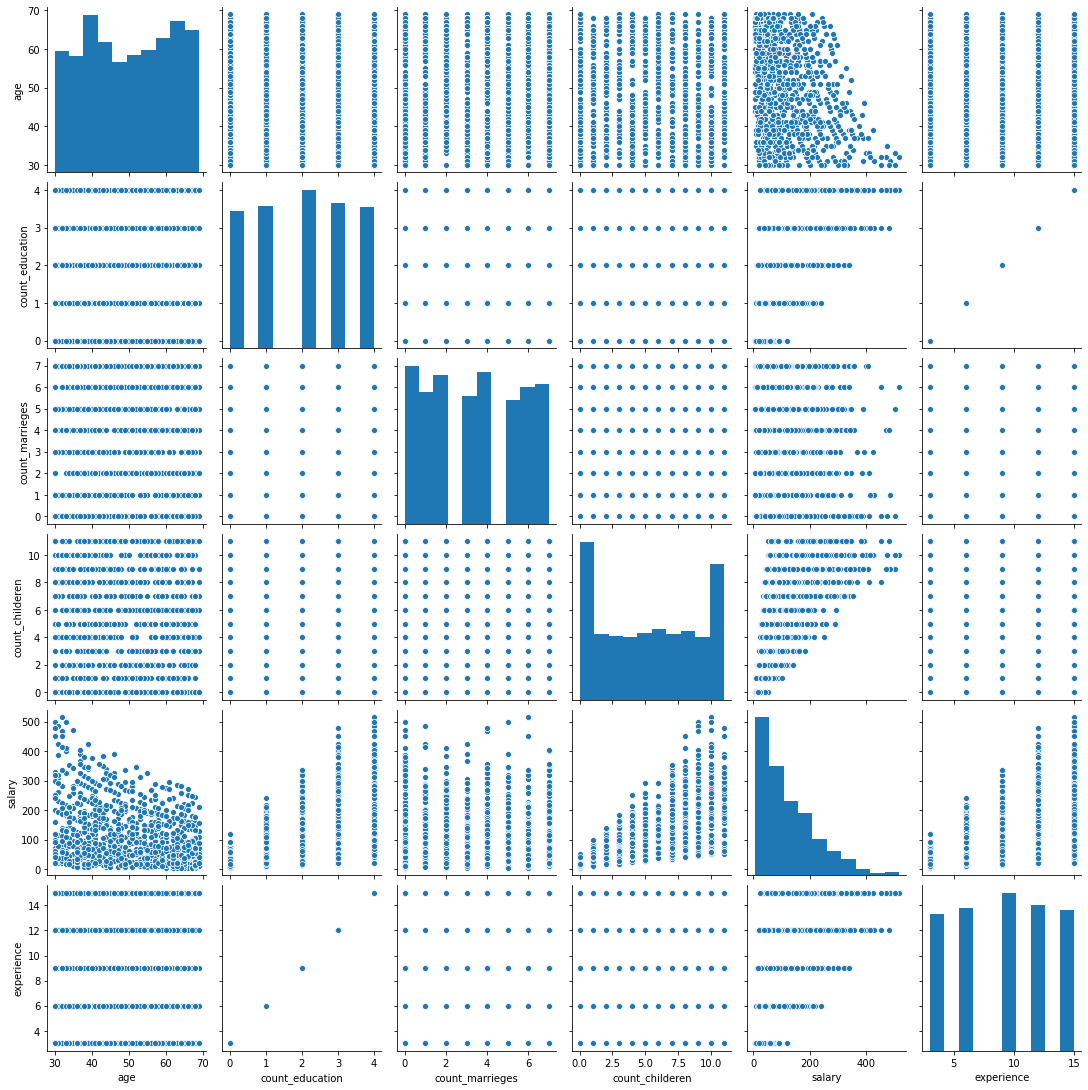

In [120]:
import seaborn as sns
sns.pairplot(df)

Видим, что с нашей целевой переменной взаимосвязи нет, следовательно данный датасет мы не сможем оптимизировать с текущими признаками

Создадим новую переменную напрямую зависящую от целевой переменной

In [125]:
df['hours_in_work'] = df['salary']/ 2
df.head()

,age,count_education,count_marrieges,count_childeren,salary,experience,age_category,hours_in_work
0,32,0,7,9,93.750000,3.0,young,46.875000
1,35,0,1,4,42.857143,3.0,young,21.428571
2,44,2,0,2,61.363636,9.0,old,30.681818
3,59,0,0,2,15.254237,3.0,middle,7.627119
4,47,3,5,9,255.319149,12.0,middle,127.659574


In [126]:
X = df[['hours_in_work']]
y = df['salary']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(df[['hours_in_work']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [2.]
Bias: 7.105427357601002e-14
Error: 4.716493862133575e-14
